In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data = data.drop(['id','date'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
print(data.nunique())

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64


# Exploratory Data Analysis

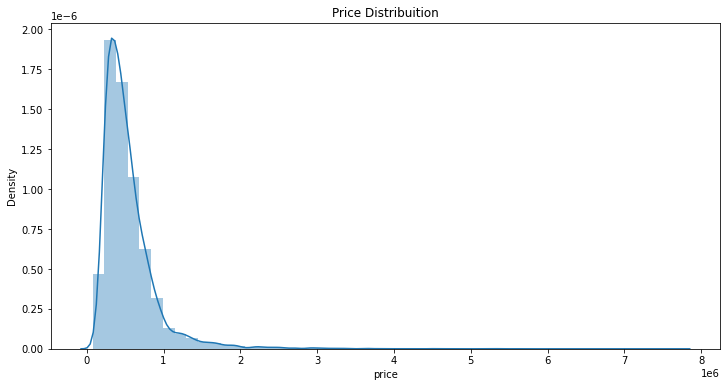

In [7]:
plt.figure(figsize = (12, 6))
plt.title('Price Distribuition')
sns.distplot(data['price'])
plt.show()

In [8]:
print("Minimum Price (in USD):"+str(data['price'].min()))
print("Mean Price (in USD):"+str(data['price'].mean()))
print("Median Price (in USD):"+str(data['price'].median()))
print("Maximum Price (in USD):"+str(data['price'].max()))
print("Price Standard Deviation (in USD):"+str(data['price'].std()))

Minimum Price (in USD):75000.0
Mean Price (in USD):540088.1417665294
Median Price (in USD):450000.0
Maximum Price (in USD):7700000.0
Price Standard Deviation (in USD):367127.1964826997


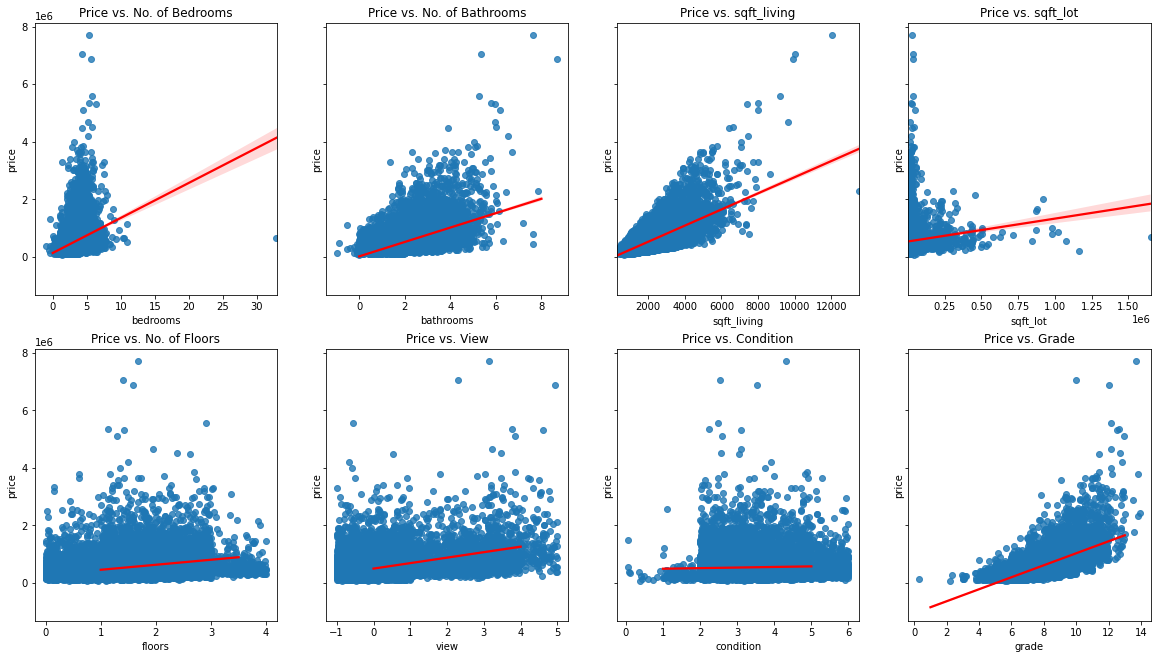

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 11), sharey=True)
sns.regplot(ax=axes[0, 0], data=data, x='bedrooms', y='price', line_kws={"color": "red"},x_jitter=True)
axes[0, 0].set_title('Price vs. No. of Bedrooms')
sns.regplot(ax=axes[0, 1], data=data, x='bathrooms', y='price',line_kws={"color": "red"}, x_jitter=True)
axes[0, 1].set_title('Price vs. No. of Bathrooms')
sns.regplot(ax=axes[0, 2], data=data, x='sqft_living', y='price',line_kws={"color": "red"}, x_jitter=True)
axes[0, 2].set_title('Price vs. sqft_living')
sns.regplot(ax=axes[0, 3], data=data, x='sqft_lot', y='price', line_kws={"color": "red"},x_jitter=True)
axes[0, 3].set_title('Price vs. sqft_lot')
sns.regplot(ax=axes[1, 0], data=data, x='floors', y='price',line_kws={"color": "red"}, x_jitter=True)
axes[1, 0].set_title('Price vs. No. of Floors')
sns.regplot(ax=axes[1, 1], data=data, x='view', y='price',line_kws={"color": "red"}, x_jitter=True)
axes[1, 1].set_title('Price vs. View')
sns.regplot(ax=axes[1, 2], data=data, x='condition', y='price',line_kws={"color": "red"}, x_jitter=True)
axes[1, 2].set_title('Price vs. Condition')
sns.regplot(ax=axes[1, 3], data=data, x='grade', y='price', line_kws={"color": "red"},x_jitter=True)
axes[1, 3].set_title('Price vs. Grade')
plt.show()

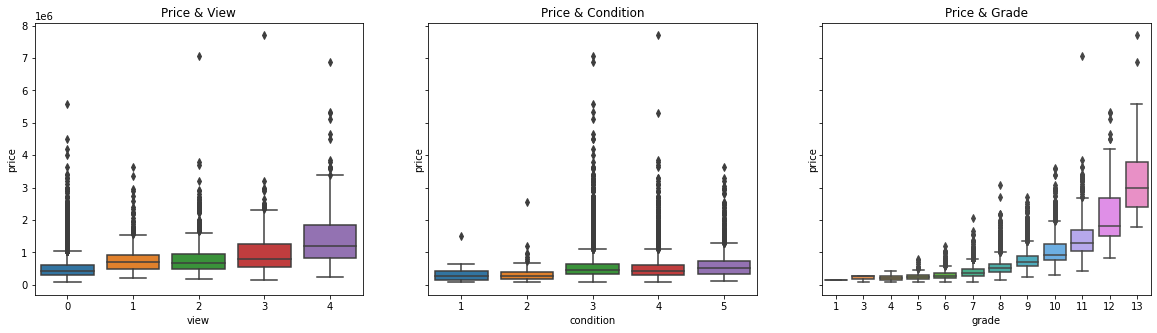

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.boxplot(ax=axes[0], data=data, x='view', y='price')
axes[0].set_title('Price & View')
sns.boxplot(ax=axes[1], data=data, x='condition', y='price')
axes[1].set_title('Price & Condition')
sns.boxplot(ax=axes[2], data=data, x='grade', y='price')
axes[2].set_title('Price & Grade')
plt.show()

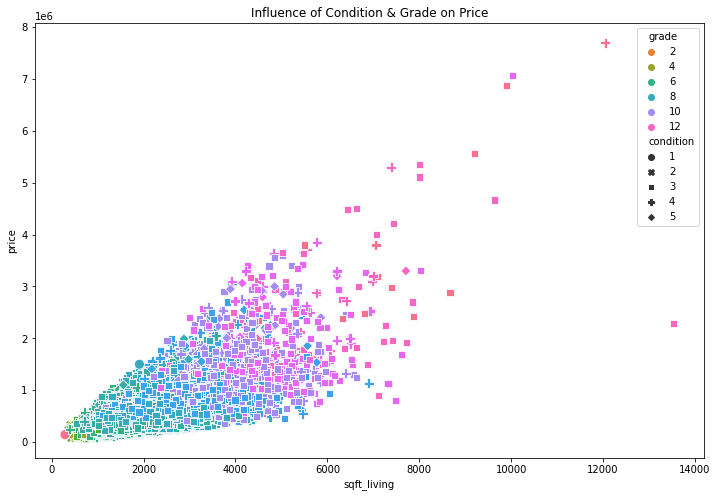

In [11]:
plt.figure(figsize = (12,8))
plt.title('Influence of Condition & Grade on Price')
sns.scatterplot(data=data, x='sqft_living', y='price',palette='husl', hue='grade',style='condition',s=100)
plt.show()

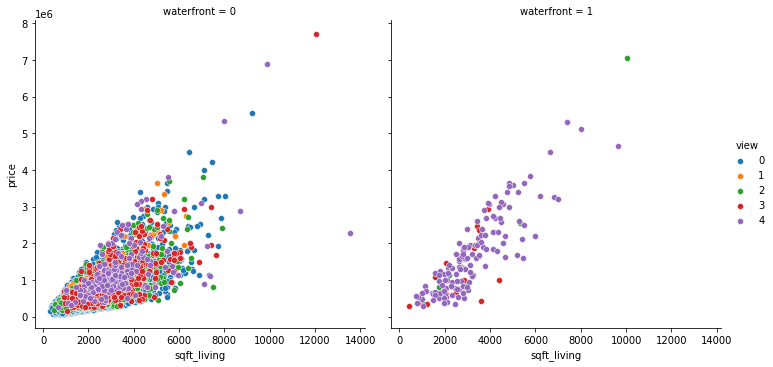

In [12]:
g = sns.FacetGrid(data, col="waterfront", hue="view",height=5)
g.map_dataframe(sns.scatterplot, x="sqft_living", y="price")
g.set_axis_labels("sqft_living", "price")
g.add_legend()
plt.show()

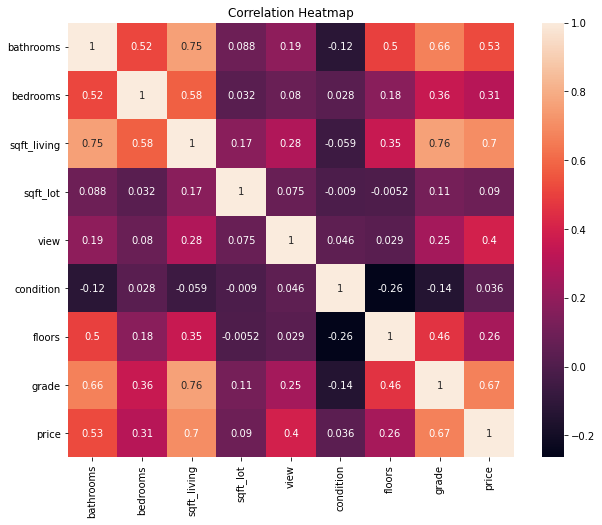

In [13]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'view' , 'condition', 'floors', 'grade', 'price']]
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

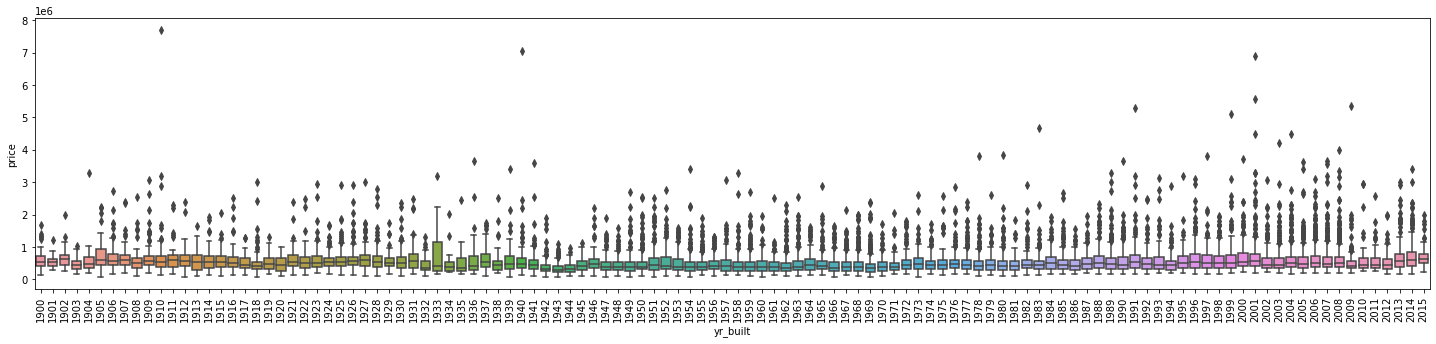

In [14]:
plt.figure(figsize=(25,5))
g = sns.boxplot(x="yr_built", y = "price", data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

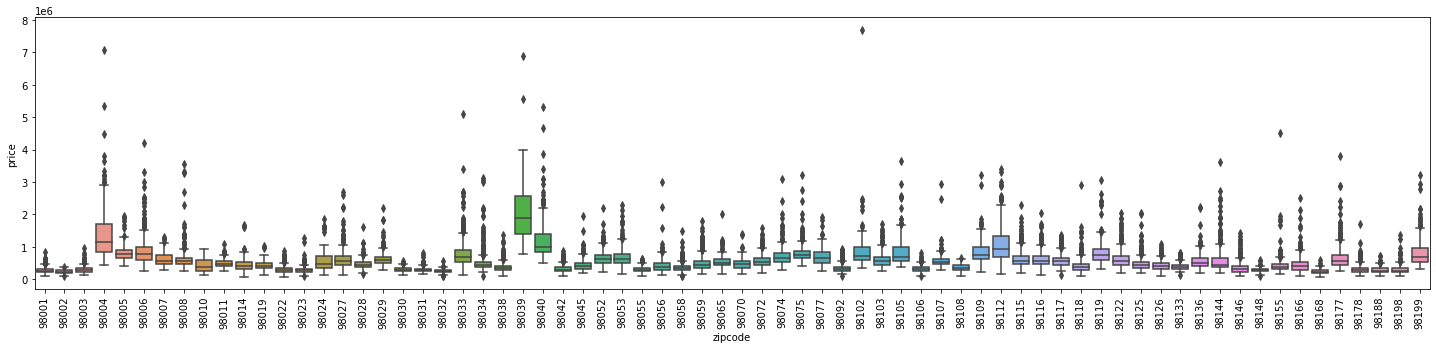

In [15]:
plt.figure(figsize=(25,5))
g = sns.boxplot(x="zipcode", y = "price", data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [16]:
X = data.drop('price',axis =1).values
y = data['price'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Mutiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Intercept:"+ str(regressor.intercept_))
y_pred = regressor.predict(X_test)
coeff_df = pd.DataFrame(regressor.coef_, data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df 

Intercept:539816.6229271655


,Coefficient
bedrooms,-3.033951e+04
bathrooms,3.208671e+04
sqft_living,1.501081e+17
sqft_lot,2.842625e+03
floors,4.957740e+03
waterfront,4.543370e+04
view,4.064248e+04
condition,1.811030e+04
grade,1.156589e+05
sqft_above,-1.351238e+17


In [18]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error (MAE): 127329.66632176086
Mean Squared Error (MSE): 44501227726.90632
Root Mean Squared Error (RMSE): 210953.14106906852
VarScore: 0.7061478945760455


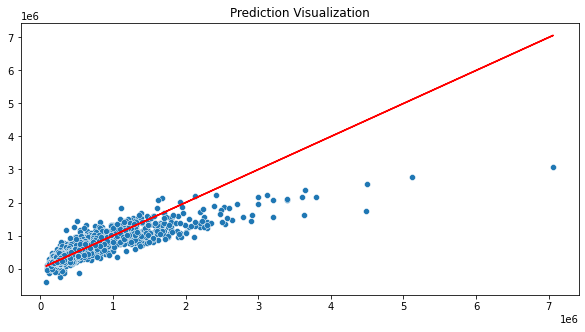

In [19]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title("Prediction Visualization")
plt.show()